In [1]:
import pandas as pd
df = pd.read_csv('./clean2.xls')
df.head()
df1 = df[["Pay_mean","bill_mean"]]

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,max_iter=500,algorithm='auto')
kmeans.fit(df1)

/Users/sachinvel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sachinvel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=3)

In [3]:
x = kmeans.fit_predict(df1)
df1['cluster']=x
df1.head()

/Users/sachinvel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sachinvel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/var/folders/3m/lw4t9hhs5dx5tw57p9vr4l4c0000gn/T/ipykernel_68298/2438326970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster']=x


,Pay_mean,bill_mean,cluster
0,114.833333,1284.000000,0
1,833.333333,2846.166667,0
2,1836.333333,16942.166667,0
3,1398.000000,38555.666667,0
4,9841.500000,18223.166667,0


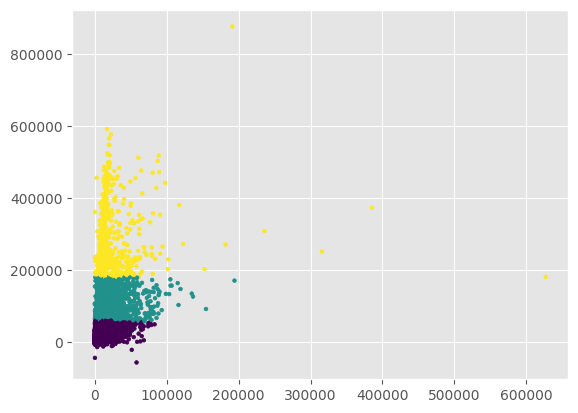

In [4]:

from matplotlib import pyplot as plt

plt.style.use('ggplot')
f1 = df1['Pay_mean'].values
f2 = df1['bill_mean'].values
plt.scatter(f1, f2, c=df1['cluster'], s=7)

In [5]:
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters=10,affinity='euclidean', linkage='ward')
Hclustering.fit(df1)
df1['hcluster'] = Hclustering.labels_

/Users/sachinvel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/var/folders/3m/lw4t9hhs5dx5tw57p9vr4l4c0000gn/T/ipykernel_68298/861013037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hcluster'] = Hclustering.labels_


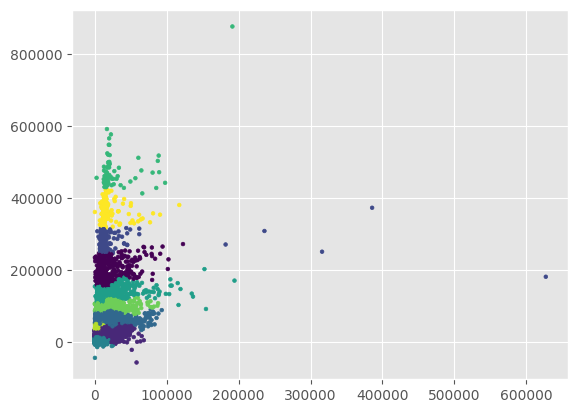

In [6]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')
f1 = df1['Pay_mean'].values
f2 = df1['bill_mean'].values
plt.scatter(f1, f2, c=df1['hcluster'], s=7)

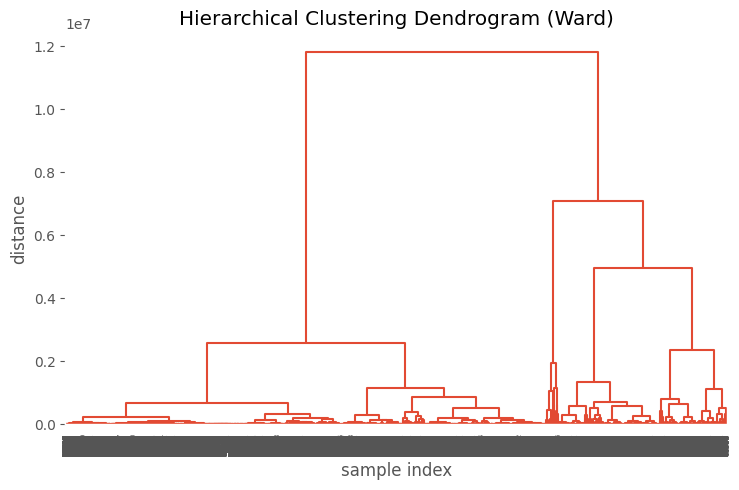

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df1, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()